# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinant" data-toc-modified-id="Determinant-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinant</a></div><div class="lev2 toc-item"><a href="#Definition-of-determinant" data-toc-modified-id="Definition-of-determinant-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definition of determinant</a></div><div class="lev2 toc-item"><a href="#Some-interpretations-of-determinant" data-toc-modified-id="Some-interpretations-of-determinant-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Some interpretations of determinant</a></div><div class="lev2 toc-item"><a href="#Some-properties-of-determinant-(important)" data-toc-modified-id="Some-properties-of-determinant-(important)-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Some properties of determinant (important)</a></div>

# Determinant

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2022fall/slides/09-det`


Status `~/Documents/github.com/ucla-biostat-216/2022fall/slides/09-det/Project.toml`
  [91a5bcdd] Plots v1.35.5
  [0c5d862f] Symbolics v4.13.0
  [37e2e46d] LinearAlgebra


In [2]:
using LinearAlgebra, Plots, Symbolics

We review some basic facts about matrix determinant.

## Definition of determinant

- The **determinant** of a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ is 
$$
    \det (\mathbf{A}) = \sum (-1)^{\phi(j_1,\ldots,j_n)} \prod_{i=1}^n a_{ij_i},
$$
where the summation is over all permutation $(j_1, \ldots, j_n)$ of the set of integers $(1,\ldots,n)$ and $\phi(j_1,\ldots,j_n)$ is the number of transpositions to change $(1,\ldots,n)$ to $(j_1,\ldots,j_n)$. $(-1)^{\phi(j_1,\ldots,j_n)}$ is also called the **sign of permutation**.

- Examples: $n = 2$ and 3.
$$
    \det \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} = (-1)^{\phi(1,2)} a_{11} a_{22} + (-1)^{\phi(2,1)} a_{12} a_{21} = a_{11} a_{22} - a_{12} a_{21}.
$$

In [3]:
# n = 2
@variables A[1:2, 1:2]

1-element Vector{Symbolics.Arr{Num, 2}}:
 A[1:2,1:2]

In [4]:
det(A) |> Symbolics.scalarize

A[1, 1]*A[2, 2] - A[1, 2]*A[2, 1]

In [5]:
# n = 3
@variables A[1:3, 1:3]

1-element Vector{Symbolics.Arr{Num, 2}}:
 A[1:3,1:3]

In [6]:
det(A) |> Symbolics.scalarize |> expand

A[1, 2]*A[2, 3]*A[3, 1] + A[1, 1]*A[2, 2]*A[3, 3] + A[1, 3]*A[2, 1]*A[3, 2] - A[1, 2]*A[2, 1]*A[3, 3] - A[1, 3]*A[2, 2]*A[3, 1] - A[1, 1]*A[2, 3]*A[3, 2]

In [7]:
# n = 4
@variables A[1:4, 1:4]

1-element Vector{Symbolics.Arr{Num, 2}}:
 A[1:4,1:4]

In [8]:
det(A) |> Symbolics.scalarize |> expand

A[1, 3]*A[2, 1]*A[3, 2]*A[4, 4] + A[1, 1]*A[2, 4]*A[3, 2]*A[4, 3] + A[1, 1]*A[2, 3]*A[3, 4]*A[4, 2] + A[1, 3]*A[2, 4]*A[3, 1]*A[4, 2] + A[1, 2]*A[2, 4]*A[3, 3]*A[4, 1] + A[1, 2]*A[2, 3]*A[3, 1]*A[4, 4] + A[1, 4]*A[2, 2]*A[3, 1]*A[4, 3] + A[1, 4]*A[2, 1]*A[3, 3]*A[4, 2] + A[1, 2]*A[2, 1]*A[3, 4]*A[4, 3] + A[1, 3]*A[2, 2]*A[3, 4]*A[4, 1] + A[1, 4]*A[2, 3]*A[3, 2]*A[4, 1] + A[1, 1]*A[2, 2]*A[3, 3]*A[4, 4] - A[1, 4]*A[2, 1]*A[3, 2]*A[4, 3] - A[1, 3]*A[2, 2]*A[3, 1]*A[4, 4] - A[1, 3]*A[2, 1]*A[3, 4]*A[4, 2] - A[1, 4]*A[2, 2]*A[3, 3]*A[4, 1] - A[1, 2]*A[2, 1]*A[3, 3]*A[4, 4] - A[1, 2]*A[2, 4]*A[3, 1]*A[4, 3] - A[1, 4]*A[2, 3]*A[3, 1]*A[4, 2] - A[1, 3]*A[2, 4]*A[3, 2]*A[4, 1] - A[1, 1]*A[2, 2]*A[3, 4]*A[4, 3] - A[1, 1]*A[2, 3]*A[3, 2]*A[4, 4] - A[1, 2]*A[2, 3]*A[3, 4]*A[4, 1] - A[1, 1]*A[2, 4]*A[3, 3]*A[4, 2]

## Some interpretations of determinant

<img src="./determinant.png" width=400 align="center"/>

- Interpretation of the (absolute value of) determinant as the **volume of the parallelotope** defined by the columns of the matrix. For example, if $\mathbf{X} \in \mathbb{R}^2$ has two columns $\mathbf{x}_1$ and $\mathbf{x}_2$, then
\begin{eqnarray*}
	\text{area} &=& bh = \|\mathbf{x}_1\|\|\mathbf{x}_2\| \sin(\theta) \\
	&=& \|\mathbf{x}_1\| \|\mathbf{x}_2\| \sqrt{1 - \left( \frac{\langle \mathbf{x}_1, \mathbf{x}_2 \rangle}{\|\mathbf{x}_1\| \|\mathbf{x}_2\|} \right)^2} \\
	&=& \sqrt{\|\mathbf{x}_1\|^2 \|\mathbf{x}\|^2 - (\langle \mathbf{x}_1, \mathbf{x}_2\rangle)^2} \\
	&=& \sqrt{(x_{11}^2 + x_{12}^2)(x_{21}^2+x_{22}^2) - (x_{11}x_{21} + x_{12}x_{22})^2} \\
	&=& |x_{11} x_{22} - x_{12} x_{21}| \\
	&=& |\det(\mathbf{X})|.
\end{eqnarray*}

<img src="./Determinant_parallelepiped.svg" width=400 align="center"/>

- Another interpretation of the determinant is the volume changing factor when operating on a set in $\mathbb{R}^n$. $\text{vol}(f(S)) = |\det(\mathbf{A})| \text{vol}(S)$ where $f: \mathbb{R}^n \mapsto \mathbb{R}^n$ is the linear mapping defined by $\mathbf{A}$.

- Recall that for differentiable function $f: \mathbb{R}^n \mapsto \mathbb{R}^n$,  the **Jacobian matrix** $\operatorname{D} f(\mathbf{x}) \in \mathbb{R}^{n \times n}$ is
$$
\operatorname{D} f(\mathbf{x}) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} (\mathbf{x}) & \frac{\partial f_1}{\partial x_2} (\mathbf{x}) & \cdots & \frac{\partial f_1}{\partial x_n} (\mathbf{x}) \\
\frac{\partial f_2}{\partial x_1} (\mathbf{x}) & \frac{\partial f_2}{\partial x_2} (\mathbf{x}) & \cdots & \frac{\partial f_2}{\partial x_n} (\mathbf{x}) \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_n}{\partial x_1} (\mathbf{x}) & \frac{\partial f_n}{\partial x_2} (\mathbf{x}) & \cdots & \frac{\partial f_n}{\partial x_n} (\mathbf{x})
\end{pmatrix} = \begin{pmatrix}
\nabla f_1(\mathbf{x})' \\
\nabla f_2(\mathbf{x})' \\
\vdots \\
\nabla f_n(\mathbf{x})'
\end{pmatrix}.
$$
Its determinant, the **Jacobian determinant**, appears in the higher-dimensional version of **integration by substitution** or **change of variable**
$$
\int_{f(U)} \phi(\mathbf{v}) \, \operatorname{d} \mathbf{v} = \int_U \phi(f(\mathbf{u})) | \det \operatorname{D} f(\mathbf{u})| \, \operatorname{d} \mathbf{u}
$$
for function $\phi: \mathbb{R}^n \mapsto \mathbb{R}$. This result will be used in transformation of random variables in 202A.

    For an example of $n=1$, an indefinite integral can be transformed to a definite integral over box [-1,1] via change of variable $v = u / (1-u^2)$:
$$
\int_{-\infty}^\infty f(v) \, dv = \int_{-1}^1 f\left(\frac{u}{1-u^2}\right) \frac{1+u^2}{(1-u^2)^2} \, du.
$$

## Some properties of determinant (important)

- The determinant of a **lower or upper triangular matrix** $\mathbf{A}$ is the product of the diagonal elements $\prod_{i=1}^n a_{ii}$. (Why?)

- Any square matrix $\mathbf{A}$ is singular if and only if $\det(\mathbf{A}) = 0$.

    Proof (optional): see BR p287.

- Product rule: $\det(\mathbf{A} \mathbf{B}) = \det(\mathbf{A}) \det(\mathbf{B})$.

    Proof (optional): see BR p288-289.

    Product rule is extremely useful. For example, computer calculates the determinant of a square matrix $\mathbf{A}$ by first computing the LU decomposition $\mathbf{A} = \mathbf{L} \mathbf{U}$ and then $\det(\mathbf{A}) = \det(\mathbf{L}) \det(\mathbf{U})$.

- Determinant of an orthogonal matrix is 1 (**rotation**) or -1 (**reflection**).  
    This classifies orthogonal matrices into two classes: rotations and reflections.  

In [9]:
# a rotator
θ = π/4
A = [cos(θ) -sin(θ); 
    sin(θ) cos(θ)]

2×2 Matrix{Float64}:
 0.707107  -0.707107
 0.707107   0.707107

In [10]:
det(A)

1.0

In [11]:
# a reflector
B = [cos(θ) sin(θ); 
    sin(θ) -cos(θ)]

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [12]:
B'B

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [13]:
det(B)

-1.0

In [14]:
# 3 points for a triangle
X = [1 1 2 1; 1 3 1 1]
# rotation
Xrot = A * X
# reflection
Xref = B * X

2×4 Matrix{Float64}:
  1.41421       2.82843  2.12132    1.41421
 -1.11022e-16  -1.41421  0.707107  -1.11022e-16

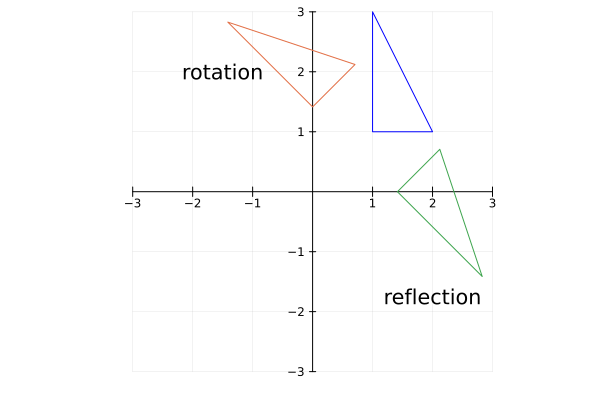

In [15]:
plt = plot(X[1, :], X[2, :], color = :blue,
    legend = :none, xlims = (-3, 3), ylims = (-3, 3),
    xticks = -3:1:3, yticks = -3:1:3,
    framestyle = :origin,
    aspect_ratio = :equal)
plot!(plt, Xrot[1, :], Xrot[2, :])
plot!(plt, Xref[1, :], Xref[2, :], 
    annotations = [(-1.5, 2, "rotation"), (2, -1.75, "reflection")])

-  $\det(\mathbf{A}') = \det(\mathbf{A})$.

- $\det(\mathbf{A}^{-1}) = 1/\det(\mathbf{A})$.

- $\det(c\mathbf{A}) = c^n \det(\mathbf{A})$.

- Determinant of a permutation matrix is the sign of the corresponding permutation. 

- Determinant of diagonal block matrix
\begin{eqnarray*}
	\det \left( \begin{pmatrix}
	\mathbf{A} & \mathbf{O} \\
	\mathbf{O} & \mathbf{D}
	\end{pmatrix} \right) = \det (\mathbf{A}) \det (\mathbf{D}).
\end{eqnarray*}

- For $\mathbf{A}$ and $\mathbf{D}$ square and nonsingular, 
\begin{eqnarray*}
	\det \left( \begin{pmatrix}
	\mathbf{A} & \mathbf{B} \\
	\mathbf{C} & \mathbf{D}
	\end{pmatrix} \right) = \det (\mathbf{A}) \det (\mathbf{D} - \mathbf{C} \mathbf{A}^{-1} \mathbf{B}) = \det(\mathbf{D}) \det(\mathbf{A} - \mathbf{B} \mathbf{D}^{-1} \mathbf{C}).
\end{eqnarray*}

    Proof: Take determinant on the both sides of the matrix identity
\begin{eqnarray*}
	\begin{pmatrix}
	\mathbf{A} & \mathbf{0} \\
	\mathbf{0} & \mathbf{D} - \mathbf{C} \mathbf{A}^{-1} \mathbf{B}
	\end{pmatrix} = \begin{pmatrix}
	\mathbf{I} & \mathbf{0} \\ - \mathbf{C} \mathbf{A}^{-1} & \mathbf{I}
	\end{pmatrix} \begin{pmatrix}
	\mathbf{A} & \mathbf{B} \\
	\mathbf{C} & \mathbf{D}
	\end{pmatrix} \begin{pmatrix}
	\mathbf{I} & - \mathbf{A}^{-1} \mathbf{B} \\
	\mathbf{0} & \mathbf{I}
	\end{pmatrix}.
\end{eqnarray*}